## 1.

(1) Class를 목표변수로 하고, 나머지 모든 변수를 입력변수로 활용한다. entropy를 불순
도 지표로 사용하여 의사결정나무를 생성하고 5겹 교차 검증을 통해 성과를 측정하
려고 한다. 성과지표는 f1을 활용하며, max_depth 값을 2부터 15까지 변화시켜가며
측정하고 결과를 시각화하라.

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)

card = pd.read_csv('data/creditcard_sampled.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,124265.0,1.522319,-2.620740,0.162082,-0.413442,-2.017811,1.461869,-1.975232,0.593168,1.590390,...,0.448753,1.026305,-0.144135,0.248102,-0.329750,-0.023030,0.024540,0.003180,284.00,0
1,59241.0,-0.224159,1.180560,1.620263,2.597663,0.268749,0.371741,0.747209,-0.039479,-1.383652,...,0.116251,0.546184,-0.157833,-0.014209,-0.354865,0.228212,0.222947,-0.014396,37.33,0
2,46775.0,1.249077,-1.180277,-0.383561,-0.921614,-0.350447,0.928311,-0.825273,0.352892,-0.198168,...,-0.030222,-0.324440,-0.279178,-1.751429,0.561524,-0.125653,-0.010366,-0.007555,102.00,0
3,166573.0,2.153038,0.046845,-2.212044,0.244870,0.730598,-1.017290,0.611115,-0.412808,0.258610,...,0.065511,0.338889,-0.025033,0.540896,0.418683,0.698257,-0.121885,-0.082522,0.76,0
4,49187.0,0.723978,-1.256455,0.381422,0.074468,-0.777243,0.722340,-0.370069,0.165191,0.886716,...,-0.085468,-0.601468,-0.325365,-0.717631,0.185812,0.965630,-0.086032,0.041443,281.48,0


In [2]:
X = card.drop('Class', axis=1)
y = card['Class']

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [4]:
score_list = []
I = range(2,16)

for i in I:
    tree_cv = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    scores = cross_val_score(tree_cv, X, y, scoring='f1', cv=5)
    score_list.append(scores.mean())
    print("f1 score with max_depth {}: {:.3f}".format(i,scores.mean()))

f1 score with max_depth 2: 0.914
f1 score with max_depth 3: 0.922
f1 score with max_depth 4: 0.932
f1 score with max_depth 5: 0.939
f1 score with max_depth 6: 0.948
f1 score with max_depth 7: 0.957
f1 score with max_depth 8: 0.958
f1 score with max_depth 9: 0.959
f1 score with max_depth 10: 0.963
f1 score with max_depth 11: 0.961
f1 score with max_depth 12: 0.963
f1 score with max_depth 13: 0.958
f1 score with max_depth 14: 0.959
f1 score with max_depth 15: 0.963


In [5]:
import matplotlib.pyplot as plt

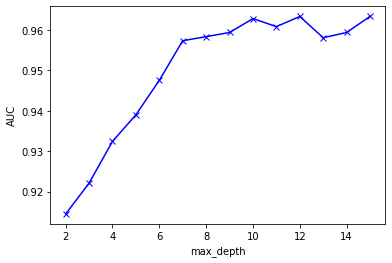

In [6]:
plt.plot(I, score_list, 'bx-')
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.show()

(2) Time, Amount, Class를 제외한 V1, …, V28 변수를 차원축소하고자 한다. 95% 분산이
보존되게끔 차원의 수를 축소하여라.

In [7]:
X = X.drop('Time', axis=1)
X = X.drop('Amount', axis=1)

In [8]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.522319,-2.620740,0.162082,-0.413442,-2.017811,1.461869,-1.975232,0.593168,1.590390,0.443273,...,1.314764,0.465669,0.448753,1.026305,-0.144135,0.248102,-0.329750,-0.023030,0.024540,0.003180
1,-0.224159,1.180560,1.620263,2.597663,0.268749,0.371741,0.747209,-0.039479,-1.383652,1.294396,...,1.107195,0.370775,0.116251,0.546184,-0.157833,-0.014209,-0.354865,0.228212,0.222947,-0.014396
2,1.249077,-1.180277,-0.383561,-0.921614,-0.350447,0.928311,-0.825273,0.352892,-0.198168,0.653288,...,1.509705,0.098564,-0.030222,-0.324440,-0.279178,-1.751429,0.561524,-0.125653,-0.010366,-0.007555
3,2.153038,0.046845,-2.212044,0.244870,0.730598,-1.017290,0.611115,-0.412808,0.258610,0.182194,...,0.258236,-0.244724,0.065511,0.338889,-0.025033,0.540896,0.418683,0.698257,-0.121885,-0.082522
4,0.723978,-1.256455,0.381422,0.074468,-0.777243,0.722340,-0.370069,0.165191,0.886716,-0.429342,...,1.103373,0.572447,-0.085468,-0.601468,-0.325365,-0.717631,0.185812,0.965630,-0.086032,0.041443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,-0.194120,...,-1.577070,-0.172659,-0.008996,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238
1996,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,-1.674415,-3.426052,...,0.105879,-1.233987,0.436390,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900
1997,-1.020632,1.496959,-4.490937,1.836727,0.627318,-2.735569,-1.546274,0.459822,-0.682741,-4.363102,...,1.011626,0.443489,0.773631,0.860618,-0.304666,-0.155500,0.412166,-0.220080,0.392338,-0.020089
1998,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,-6.167234,-11.435624,...,2.992554,1.150017,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X)

(3) (2)에서 차원 축소된 결과를 데이터프레임으로 변환하고 Time, Amount 컬럼을 추가
하라. Class를 목표변수로 하고, 차원 축소된 결과와 Time, Amount 변수를 입력변수
로 활용한다. entropy를 불순도 지표로 사용하여 의사결정나무를 생성하고 5겹 교차
검증을 통해 성과를 측정하려고 한다. 성과지표는 f1을 활용하며, max_depth 값을 2
부터 15까지 변화시켜가며 측정하고 결과를 시각화하라.

In [11]:
col = list(str(i) for i in range(1, 10))
dfpca = pd.DataFrame(X_reduced, columns = col)
dfpca["Time"] = card["Time"]
dfpca["Amount"] = card["Amount"]

In [12]:
score_list = []
I = range(2,16)

for i in I:
    tree_cv = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    scores = cross_val_score(tree_cv, dfpca, y, scoring='f1', cv=5)
    score_list.append(scores.mean())
    print("f1 score with max_depth {}: {:.3f}".format(i,scores.mean()))

f1 score with max_depth 2: 0.916
f1 score with max_depth 3: 0.935
f1 score with max_depth 4: 0.940
f1 score with max_depth 5: 0.944
f1 score with max_depth 6: 0.950
f1 score with max_depth 7: 0.954
f1 score with max_depth 8: 0.957
f1 score with max_depth 9: 0.962
f1 score with max_depth 10: 0.962
f1 score with max_depth 11: 0.966
f1 score with max_depth 12: 0.966
f1 score with max_depth 13: 0.968
f1 score with max_depth 14: 0.969
f1 score with max_depth 15: 0.969


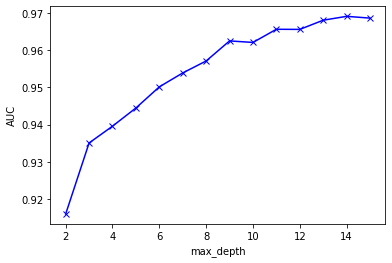

In [13]:
plt.plot(I, score_list, 'bx-')
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.show()

4.     
차원 축소 전 최고 성과 : 0.963   
차원 축소 후 최고 성과 : 0.969   

차원축소 후 성과가 더 크다

## 2.

(1) ShelveLoc 변수는 Bad는 0, Medium은 0.5, Good은 1로 변환하라. Urban과 US는 군
집화에 사용하지 않는다.

In [40]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('data/Carseats.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [42]:
nl = []
for col in data["ShelveLoc"]:
    if col == "Bad":
        inp = 0
    if col == "Medium":
        inp = 0.5
    else:
        inp = 1
    nl.append(inp)

In [43]:
data = data.drop(["ShelveLoc", "Urban", "US"], axis = 1)

In [44]:
data["ShelveLoc"] = nl

In [45]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc
0,9.50,138,73,11,276,120,42,17,1.0
1,11.22,111,48,16,260,83,65,10,1.0
2,10.06,113,35,10,269,80,59,12,0.5
3,7.40,117,100,4,466,97,55,14,0.5
4,4.15,141,64,3,340,128,38,13,1.0


(2) 모든 변수를 MinMaxScaler를 사용하여 표준화하라.

In [46]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

data_MinMax_train = min_max_scaler.fit_transform(data)

(3) 가우시안 혼합모델을 사용하여 군집화를 하고자 한다. n_init = 10으로 하고, 군집의
수는 2부터 20까지 늘려가면서 군집화를 수행한 후 군집 수에 따른 BIC, AIC 값을
시각화하라. BIC, AIC 값이 최소가 되는 군집의 수나 엘보우 방안으로 최적의 군집의
수를 찾아라.

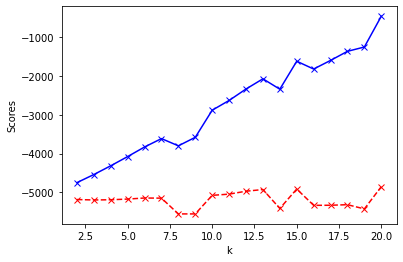

In [47]:
from sklearn.mixture import GaussianMixture

bic = list()
aic = list()

K = range(2,21)
for k in K:
    gm = GaussianMixture(n_components=k, n_init=10)
    gm.fit(data_MinMax_train)
    bic.append(gm.bic(data_MinMax_train))
    aic.append(gm.aic(data_MinMax_train))
    
plt.plot(K, bic, 'bx-')
plt.plot(K, aic, 'rx--')
plt.xlabel('k')
plt.ylabel('Scores')
plt.show()

k = 2 일때가 최적의 군집 수 이다.

(4) (3)에서 찾아진 최적의 군집 수를 활용하여 가우시안 혼합 모델 군집화를 수행한다.
각 군집에 속한 데이터의 수와 각 군집의 변수별 평균 값을 출력하고 군집 특성에 대
한 설명을 기술하라

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import silhouette_score

In [49]:
gm = GaussianMixture(n_components=9, n_init=10)
gm.fit(data_MinMax_train)
predict = pd.DataFrame(gm.predict(data))
predict.columns=['predict']  
data = pd.concat([data,predict],axis=1) 

In [50]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
Age              int64
Education        int64
ShelveLoc      float64
predict          int64
dtype: object

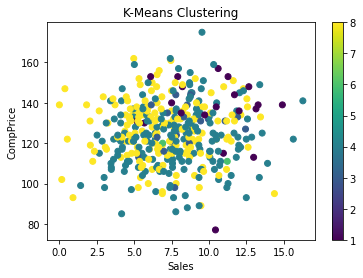

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Sales'], data["CompPrice"],
                     c=data['predict'])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Sales')
ax.set_ylabel('CompPrice')
plt.colorbar(scatter)

잘 구분되지 않는 모습을 보인다.

## 3.

(1) review를 가지고 LDA를 수행한다. 토픽 수는 3으로 하고 나머지는 다음과 같이 인
수를 입력한다. 단어문서 매트릭스는 CountVectorizer를 사용하며, stemming이나 표
제어 추출은 시행하지 않는다.

In [27]:
#pip install pyLDAvis

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

df = pd.read_csv('data/reviewContent_sampled.csv')
df.head()

,user_id,prod_id,date,review
0,20005,312,2009-11-14,Arrived at 8pm on a Sat. night to be told it's...
1,135557,721,2014-07-15,Go to for healthy + affordable dinner. LOVE th...
2,3245,701,2013-09-11,I got hives up and down my legs after their ud...
3,94371,555,2009-06-03,I happened upon this cart one night when I was...
4,2327,859,2011-03-11,I went here with a large group (10) for lunch....


In [28]:
data = df.review.values.tolist()

pprint(data[:1])

["Arrived at 8pm on a Sat. night to be told it's a 90 min. wait- but we sat at "
 'the bar and got served asap. \xa0The hosts/bartenders/servers were '
 'incredibly friendly and helpful, wonderful people. \xa0But the food was very '
 'overrated. \xa0I had the sweet potato/goat cheese croquettes, which were '
 'bland and greasy (and goat cheese and sweet potato are 2 of my favorite '
 "foods on earth!) \xa0I was starving and didn't even finish them. \xa0The "
 'mozzarella was bland on the "snacks" menu, and the rabbit rouilletts (sp?) '
 'were great but the pesto was dripping with oil. For entrees, my hubby got '
 'the fried chicken which was also bland (but juicy) and generally overrated '
 '(the slaw it came with was great though). \xa0He asked for 2 breasts but one '
 'was a strange cut w/out a lot of meat on it. \xa0One tasted almost '
 'undercooked. I got the duck meatloaf, which was too salty. \xa0The onion '
 'ring it came with was totally tasteless, and the turnip/parsnip puree 

In [29]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
data_words = list(sent_to_words(data)) 
print(data_words[:1])

[['arrived', 'at', 'pm', 'on', 'sat', 'night', 'to', 'be', 'told', 'it', 'min', 'wait', 'but', 'we', 'sat', 'at', 'the', 'bar', 'and', 'got', 'served', 'asap', 'the', 'hosts', 'bartenders', 'servers', 'were', 'incredibly', 'friendly', 'and', 'helpful', 'wonderful', 'people', 'but', 'the', 'food', 'was', 'very', 'overrated', 'had', 'the', 'sweet', 'potato', 'goat', 'cheese', 'croquettes', 'which', 'were', 'bland', 'and', 'greasy', 'and', 'goat', 'cheese', 'and', 'sweet', 'potato', 'are', 'of', 'my', 'favorite', 'foods', 'on', 'earth', 'was', 'starving', 'and', 'didn', 'even', 'finish', 'them', 'the', 'mozzarella', 'was', 'bland', 'on', 'the', 'snacks', 'menu', 'and', 'the', 'rabbit', 'rouilletts', 'sp', 'were', 'great', 'but', 'the', 'pesto', 'was', 'dripping', 'with', 'oil', 'for', 'entrees', 'my', 'hubby', 'got', 'the', 'fried', 'chicken', 'which', 'was', 'also', 'bland', 'but', 'juicy', 'and', 'generally', 'overrated', 'the', 'slaw', 'it', 'came', 'with', 'was', 'great', 'though', 'h

In [30]:
## 표제어 추출 함수 (명사, 형용사, 동사, 부사)

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [31]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:2])

['arrive pm night tell wait sit bar get serve asap host bartender server incredibly friendly helpful wonderful people food very overrated sweet potato cheese croquette bland greasy cheese sweet potato favorite food earth starve even finish mozzarella bland snack menu rabbit rouillett great pesto drip oil entree hubby get fry chicken also bland juicy generally overrate slaw come great ask breast strange cut lot meat taste almost undercooked get duck meatloaf too salty onion ring come totally tasteless turnip puree just ok hubby get root beer float dessert way too cappuccino terrible amazing practically lick plate glass wine dinner save money go elsewhere so worth time min really money consider other amazing option chicken how eff mess', 'go healthy affordable dinner love platter soup also very flavorful fill can tell use good quality olive oil']


In [32]:
# 빈도 기반 단어 문서 매트릭스 생성

vectorizer = CountVectorizer(
 analyzer='word',
 min_df=5,
 stop_words='english',
 lowercase=True,
 token_pattern='[a-zA-Z0-9]{2,}'
)

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [33]:
# 토픽 3개 LDA 실행

NUM_TOPICS = 3
lda_model = LatentDirichletAllocation(
 n_components=NUM_TOPICS,
 max_iter=10,
 learning_method='online',
 random_state=100,
 batch_size=128,
 evaluate_every = -1,
 n_jobs = -1,
)

lda_output = lda_model.fit_transform(data_vectorized)

In [34]:
log = lda_model.score(data_vectorized)
print(log)

-556396.3448264957


In [35]:
per = lda_model.perplexity(data_vectorized)
print(per)

832.7361274932141


In [36]:
# 문서별 대표 토픽 및 토픽에 속할 확률

# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.050000,0.280000,0.670000,2
Doc1,0.030000,0.490000,0.480000,1
Doc2,0.050000,0.900000,0.050000,1
Doc3,0.420000,0.460000,0.120000,1
Doc4,0.260000,0.010000,0.730000,2
Doc5,0.040000,0.040000,0.930000,2
Doc6,0.180000,0.800000,0.010000,1
Doc7,0.380000,0.010000,0.610000,2
Doc8,0.050000,0.050000,0.910000,2
Doc9,0.500000,0.030000,0.480000,0


In [37]:
# 토픽에 속한 단어 

def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15) 
topic_keywords

[array(['wait', 'food', 'time', 'good', 'order', 'raman', 'table',
        'restaurant', 'just', 'come', 'experience', 'service', 'say',
        'minute', 'hour'], dtype='<U14'),
 array(['good', 'place', 'sauce', 'order', 'pizza', 'just', 'come',
        'chicken', 'eat', 'try', 'make', 'pork', 'taste', 'really', 'food'],
       dtype='<U14'),
 array(['food', 'good', 'place', 'great', 'service', 'really', 'come',
        'nice', 'restaurant', 'delicious', 'price', 'time', 'dinner',
        'love', 'just'], dtype='<U14')]

[array(['wait', 'food', 'time', 'good', 'order', 'raman', 'table',     
        'restaurant', 'just', 'come', 'experience', 'service', 'say',      
        'minute', 'hour'], dtype='<U14'),     
 array(['good', 'place', 'sauce', 'order', 'pizza', 'just', 'come',      
        'chicken', 'eat', 'try', 'make', 'pork', 'taste', 'really', 'food'],       
       dtype='<U14'),     
 array(['food', 'good', 'place', 'great', 'service', 'really', 'come',      
        'nice', 'restaurant', 'delicious', 'price', 'time', 'dinner',     
        'love', 'just'], dtype='<U14')]     
             
으로 리뷰에 포함된 토픽을 찾아보았다.

(2) (1)에서 수행한 LDA 결과를 pyLDAvis 라이브러리를 활용하여 시각화하고, 각 토픽
에 적당한 토픽명을 붙여라.

In [38]:
# 토픽 모델링 결과 시각화

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2     -0.026542 -0.103940       1        1  39.94769
1     -0.097359  0.070673       2        1  37.12517
0      0.123901  0.033267       3        1  22.92714, topic_info=       Term        Freq       Total Category  logprob  loglift
1943   wait  612.000000  612.000000  Default  30.0000  30.0000
1531  sauce  443.000000  443.000000  Default  29.0000  29.0000
1415  raman  214.000000  214.000000  Default  28.0000  28.0000
1303  pizza  394.000000  394.000000  Default  27.0000  27.0000
800   great  898.000000  898.000000  Default  26.0000  26.0000
...     ...         ...         ...      ...      ...      ...
1062   make  137.666320  616.047468   Topic3  -4.9258  -0.0256
1829  think  106.559753  349.313451   Topic3  -5.1819   0.2856
1952   want   98.954123  326.083993   Topic3  -5.2559   0.2804
574     eat  112.103818  535.711435   Topic3  -5.1312  -0.0913
1084   meal   86.156039  290.191333   Topic3  -5.3944   0.2585

[250 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
16        1  0.027904         add
16        2  0.837122         add
16        3  0.130219         add
20        2  0.094044  additional
20        3  0.893422  additional
...     ...       ...         ...
2008      2  0.409655       worth
2008      3  0.400652       worth
2015      1  0.077151        year
2015      2  0.222882        year
2015      3  0.694362        year

[433 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

time = ['wait', 'food', 'time', 'good', 'order', 'raman', 'table',        
        'restaurant', 'just', 'come', 'experience', 'service', 'say',       
        'minute', 'hour']       
      
food = ['good', 'place', 'sauce', 'order', 'pizza', 'just', 'come',        
'chicken', 'eat', 'try', 'make', 'pork', 'taste', 'really', 'food']        
      
service = ['food', 'good', 'place', 'great', 'service', 'really', 'come',        
        'nice', 'restaurant', 'delicious', 'price', 'time', 'dinner',       
        'love', 'just']       
        
              
              
으로 토픽명을 붙일 수 있다.

4.
모두 같은 데이터가 아니라 각자 관심있는 데이터를 크롤링해오고 이를 이용해서 이용해서 분석까지 해오는 과제가 있으면 재미있는 경험이 될 것 같습니다.